In [0]:
import os
import numpy as np
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
import segmentation_models_3D as sm


Segmentation Models: using `tf.keras` framework.

In [0]:
# Copy model from dbfs to databricks tmp folder
dbutils.fs.cp("dbfs:/mnt/mydata/BraTS/unet_3d.hdf5", "file:/tmp/unet_3d.hdf5")

Out[2]: True

In [0]:
#Load Trained model
model2 = keras.models.load_model("/tmp/unet_3d.hdf5",
                                 compile = False)

In [0]:
# Use model to do prediction on two randomly picked images
img_num1 = 82
img_num2 = 209

test_img1 = np.load("/dbfs/mnt/mydata/BraTS/input_data_128/val/images/image_"+str(img_num1)+".npy")

test_mask1 = np.load("/dbfs/mnt/mydata/BraTS/input_data_128/val/masks/mask_"+str(img_num1)+".npy")

test_mask_argmax1=np.argmax(test_mask1, axis=3)
test_img_input1 = np.expand_dims(test_img1, axis=0)
test_prediction1 = model2.predict(test_img_input1)
test_prediction_argmax1=np.argmax(test_prediction1, axis=4)[0,:,:,:]

test_img2 = np.load("/dbfs/mnt/mydata/BraTS/input_data_128/val/images/image_"+str(img_num2)+".npy")

test_mask2 = np.load("/dbfs/mnt/mydata/BraTS/input_data_128/val/masks/mask_"+str(img_num2)+".npy")

test_mask_argmax2=np.argmax(test_mask2, axis=3)
test_img_input2 = np.expand_dims(test_img2, axis=0)
test_prediction2 = model2.predict(test_img_input2)
test_prediction_argmax2=np.argmax(test_prediction2, axis=4)[0,:,:,:]

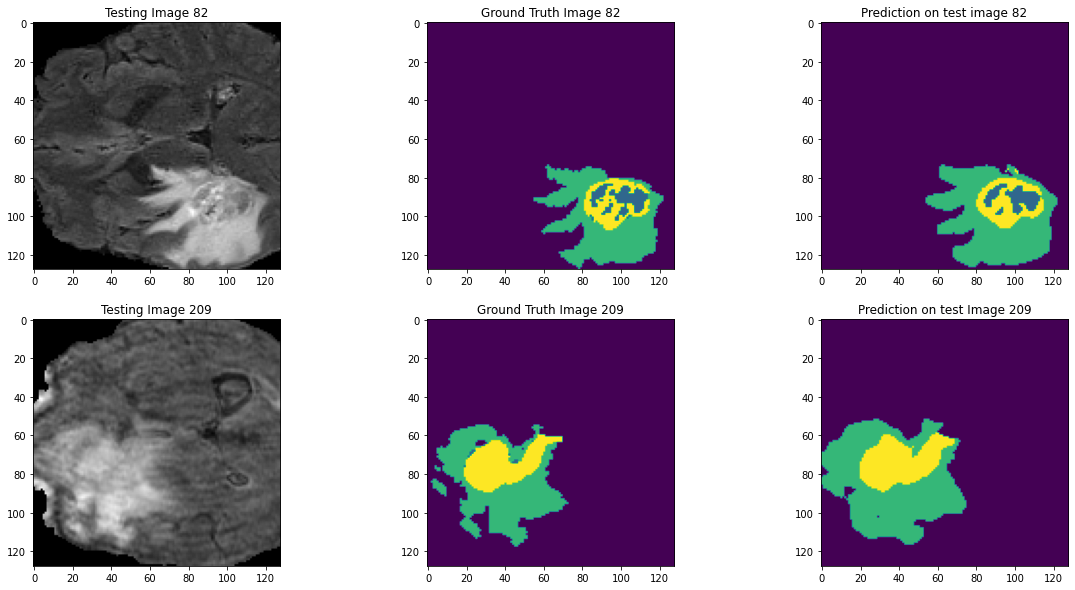

In [0]:
# display original image, ground truth and image predicted by model
n_slice = 55
plt.figure(figsize=(20, 10))
plt.subplot(231)
plt.title('Testing Image 82')
plt.imshow(test_img1[:,:,n_slice,0], cmap='gray')
plt.subplot(232)
plt.title('Ground Truth Image 82')
plt.imshow(test_mask_argmax1[:,:,n_slice])
plt.subplot(233)
plt.title('Prediction on test image 82')
plt.imshow(test_prediction_argmax1[:,:, n_slice])
plt.subplot(234)
plt.title('Testing Image 209')
plt.imshow(test_img2[:,:,n_slice,0], cmap='gray')
plt.subplot(235)
plt.title('Ground Truth Image 209')
plt.imshow(test_mask_argmax2[:,:,n_slice])
plt.subplot(236)
plt.title('Prediction on test Image 209')
plt.imshow(test_prediction_argmax2[:,:, n_slice])
plt.show()

In [0]:
img_num3 = 111
img_num4 = 179

test_img3 = np.load("/dbfs/mnt/mydata/BraTS/input_data_128/val/images/image_"+str(img_num3)+".npy")

test_mask3 = np.load("/dbfs/mnt/mydata/BraTS/input_data_128/val/masks/mask_"+str(img_num3)+".npy")

test_mask_argmax3=np.argmax(test_mask3, axis=3)
test_img_input3 = np.expand_dims(test_img3, axis=0)
test_prediction3 = model2.predict(test_img_input3)
test_prediction_argmax3=np.argmax(test_prediction3, axis=4)[0,:,:,:]

test_img4 = np.load("/dbfs/mnt/mydata/BraTS/input_data_128/val/images/image_"+str(img_num4)+".npy")

test_mask4 = np.load("/dbfs/mnt/mydata/BraTS/input_data_128/val/masks/mask_"+str(img_num4)+".npy")

test_mask_argmax4=np.argmax(test_mask4, axis=3)
test_img_input4 = np.expand_dims(test_img4, axis=0)
test_prediction4 = model2.predict(test_img_input4)
test_prediction_argmax4=np.argmax(test_prediction4, axis=4)[0,:,:,:]

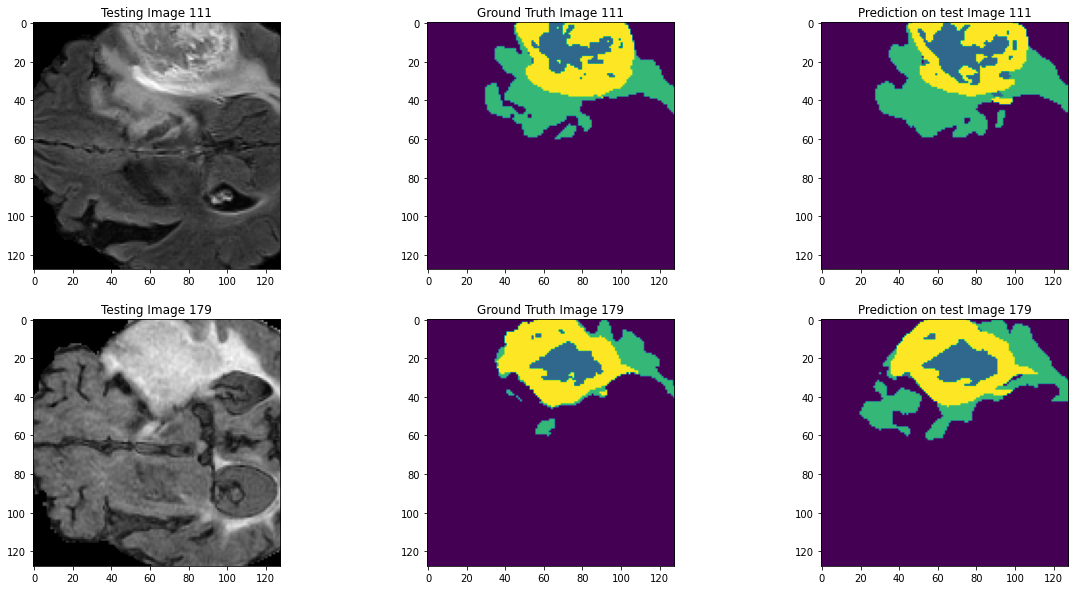

In [0]:
n_slice = 55
plt.figure(figsize=(20, 10))
plt.subplot(231)
plt.title('Testing Image 111')
plt.imshow(test_img3[:,:,n_slice,0], cmap='gray')
plt.subplot(232)
plt.title('Ground Truth Image 111')
plt.imshow(test_mask_argmax3[:,:,n_slice])
plt.subplot(233)
plt.title('Prediction on test Image 111')
plt.imshow(test_prediction_argmax3[:,:, n_slice])
plt.subplot(234)
plt.title('Testing Image 179')
plt.imshow(test_img4[:,:,n_slice,0], cmap='gray')
plt.subplot(235)
plt.title('Ground Truth Image 179')
plt.imshow(test_mask_argmax4[:,:,n_slice])
plt.subplot(236)
plt.title('Prediction on test Image 179')
plt.imshow(test_prediction_argmax4[:,:, n_slice])
plt.show()